# **Spotify Music Analysis: Audio Attributes of Drake, Britney Spears and Led Zeppelin**

This dataset is collected from Spotify's API. I filtered the data to include songs from `Drake`, `Britney Spears` or `Led Zeppelin` because they represent different genres and eras, and each of these artists dominated their respective periods and genres.

*Drake: Primarily Hip-Hop/Rap, with influences from R&B, pop, and dancehall. Drake began his career around 2009 and continues to be active.

*Britney Spears: Pop, with influences from dance-pop, teen pop, and occasionally R&B.
Period: Britney Spears' career began in the late 1990s and continues to the present, though her most influential work was from the late 1990s to the early 2000s.

*Led Zeppelin: Hard Rock, with elements of blues, folk, and heavy metal. Led Zeppelin was active primarily in the late 1960s and 1970s, with their career spanning from 1968 to 1980.

Spotify's API returns a rich set of data about each song's audio properties. These are the audio qualities they use to capture a song's feel and generate playlists geared to a user's tastes.

**The investigative goal:** What are the audio features that distiguish these three artists from one another?

In [1]:
# Let's import the packages we need to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv('Data/spotify_song_data.csv')

 ## Data Cleaning

In [3]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
0,1PWnjvzT5Jhpfnh96DRNDh,Best I Ever Had,51,258800,0,['Drake'],['3TVXtAsR1Inumwj472S9r4'],1/1/09,0.441,0.904,...,-2.636,1,0.3590,0.102,0.0000,0.1960,0.529,161.740,4,Drake
1,32nmTtZNtJq2LQQJlYc96h,My Only Wish (This Year),4,254720,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],11/30/07,0.667,0.715,...,-8.017,1,0.0269,0.184,0.0000,0.1860,0.678,147.064,4,Britney
2,6nx1JCehhu4N9j5qNALyTu,The Crunge - Remaster,34,197704,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],3/28/73,0.531,0.798,...,-8.514,1,0.1480,0.132,0.0000,0.3560,0.852,112.609,5,Zeppelin
3,4pW4DF1119GLHiuWE7Jcb4,Thank You - Remaster,48,289485,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],10/22/69,0.292,0.306,...,-13.158,1,0.0547,0.184,0.0046,0.1440,0.131,79.406,4,Zeppelin
4,1pYKzfOlpHWtVUiEIu4Vn7,What's My Name?,53,263173,0,"['Rihanna', 'Drake']","['5pKCCKE2ajJHZ9KAiaK11H', '3TVXtAsR1Inumwj472...",11/15/10,0.695,0.782,...,-2.967,1,0.0629,0.223,0.0000,0.0773,0.595,99.992,4,Drake


In [4]:
# How many rows and columns?
df.shape

(636, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                636 non-null    object 
 1   name              636 non-null    object 
 2   popularity        636 non-null    int64  
 3   duration_ms       636 non-null    int64  
 4   explicit          636 non-null    int64  
 5   artists           636 non-null    object 
 6   id_artists        636 non-null    object 
 7   release_date      636 non-null    object 
 8   danceability      636 non-null    float64
 9   energy            636 non-null    float64
 10  key               636 non-null    int64  
 11  loudness          636 non-null    float64
 12  mode              636 non-null    int64  
 13  speechiness       636 non-null    float64
 14  acousticness      636 non-null    float64
 15  instrumentalness  636 non-null    float64
 16  liveness          636 non-null    float64
 1

In [6]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist'],
      dtype='object')

In [7]:
df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
main_artist         0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [9]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,636.00000,6.360000e+02,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,51.97327,2.799651e+05,0.375786,0.556667,0.644586,4.687107,-8.618330,0.691824,0.129658,0.203935,0.072349,0.210039,0.472629,119.558011,3.926101
std,17.36802,1.146586e+05,0.484706,0.183620,0.198221,3.530460,3.164313,0.462103,0.128858,0.232138,0.201934,0.181720,0.237876,29.509409,0.411501
min,0.00000,9.837300e+04,0.000000,0.177000,0.172000,0.000000,-18.524000,0.000000,0.024500,0.000052,0.000000,0.028600,0.037100,65.041000,1.000000
25%,40.00000,2.163600e+05,0.000000,0.405500,0.487750,2.000000,-10.384250,0.000000,0.043650,0.031850,0.000000,0.098650,0.293500,96.131000,4.000000
50%,53.00000,2.552265e+05,0.000000,0.545000,0.661000,4.000000,-8.435000,1.000000,0.066150,0.103000,0.000085,0.138000,0.448000,113.879500,4.000000
75%,64.00000,3.113078e+05,1.000000,0.704000,0.824000,8.000000,-6.387500,1.000000,0.170000,0.300000,0.011900,0.252000,0.662000,141.657500,4.000000
max,91.00000,1.758307e+06,1.000000,0.963000,0.979000,11.000000,-1.304000,1.000000,0.730000,0.970000,0.949000,0.967000,0.976000,205.470000,5.000000


Let's explore the top songs across a few of these audio properties.

In [10]:
df.sort_values(by='popularity', ascending=False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
619,3aQem4jVGdhtg116TmJnHz,What’s Next,91,178154,1,['Drake'],['3TVXtAsR1Inumwj472S9r4'],3/5/21,0.781,0.594,...,-6.959,0,0.0485,0.0136,0.000000,0.1620,0.0628,129.895,4,Drake
501,65OVbaJR5O1RmwOQx0875b,Wants and Needs (feat. Lil Baby),89,192956,1,"['Drake', 'Lil Baby']","['3TVXtAsR1Inumwj472S9r4', '5f7VJjfbwm532GiveG...",3/5/21,0.578,0.449,...,-6.349,1,0.2860,0.0618,0.000002,0.1190,0.1000,136.006,4,Drake
454,2SAqBLGA283SUiwJ3xOUVI,Laugh Now Cry Later (feat. Lil Durk),88,261493,1,"['Drake', 'Lil Durk']","['3TVXtAsR1Inumwj472S9r4', '3hcs9uc56yIGFCSy9l...",8/14/20,0.761,0.518,...,-8.871,1,0.1340,0.2440,0.000035,0.1070,0.5220,133.976,4,Drake
398,6EDO9iiTtwNv6waLwa1UUq,POPSTAR (feat. Drake),86,200221,1,"['DJ Khaled', 'Drake']","['0QHgL1lAIqAw0HtD7YldmP', '3TVXtAsR1Inumwj472...",7/17/20,0.800,0.560,...,-4.818,0,0.2610,0.0570,0.000000,0.1340,0.4500,163.071,4,Drake
254,4FRW5Nza1Ym91BGV4nFWXI,Lemon Pepper Freestyle (feat. Rick Ross),86,383037,1,"['Drake', 'Rick Ross']","['3TVXtAsR1Inumwj472S9r4', '1sBkRIssrMs1AbVkOJ...",3/5/21,0.770,0.637,...,-5.530,1,0.3450,0.1030,0.000000,0.1710,0.4310,94.966,4,Drake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0WuGp1CYM6LfEwyDdciFLr,Whole Lotta Love - Rough Mix with Vocal,1,340253,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],10/22/69,0.429,0.853,...,-12.218,1,0.2730,0.3360,0.083500,0.0834,0.3470,175.319,4,Zeppelin
91,6WRkblRVnlmwWxdSILxW8f,My Only Wish (This Year),0,254253,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],3/29/19,0.670,0.806,...,-4.822,1,0.0263,0.2190,0.000000,0.2220,0.6890,147.073,4,Britney
160,7E9463kh8uCDLU3lVnnFyq,My Only Wish (This Year),0,254720,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],11/26/07,0.668,0.715,...,-8.013,1,0.0269,0.1700,0.000000,0.1850,0.6730,147.081,4,Britney
407,5IZdJx97J47zhcQ0XrQVM9,My Only Wish (This Year),0,254493,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],12/4/06,0.661,0.677,...,-9.341,1,0.0277,0.1690,0.000000,0.1930,0.7110,147.087,4,Britney


In [11]:
df.sort_values(by='duration_ms', ascending=False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist
416,0OotzYWTwTqoszW9MrXSdZ,Dazed and Confused - (Live at MSG 1973) [Remas...,40,1758307,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],10/22/76,0.307,0.897,...,-8.595,1,0.1060,0.007400,0.49900,0.9420,0.218,125.893,4,Zeppelin
30,76HR8Ox6ApIoipqrXDheZ3,"Dazed and Confused - Live in Paris, 1969",28,901640,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1/12/69,0.271,0.642,...,-10.107,1,0.0778,0.000893,0.27700,0.6340,0.125,125.768,4,Zeppelin
450,2EbfJIOLyZcyHEZosJC0dT,Whole Lotta Love - (Live at MSG 1973) [Remaster],37,832027,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],10/22/76,0.291,0.942,...,-7.912,1,0.1650,0.004500,0.03830,0.8900,0.395,105.117,4,Zeppelin
383,4EUe6BsZm5wZLxOTaV3kDX,In My Time of Dying - Remaster,39,668441,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],2/24/75,0.348,0.865,...,-9.727,1,0.0625,0.262000,0.00279,0.1210,0.471,102.078,4,Zeppelin
63,5g9VOUgrn7ozYE3ZQm8w41,In My Time of Dying - 1990 Remaster,52,665600,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],2/24/75,0.330,0.843,...,-10.221,1,0.0581,0.137000,0.00586,0.1990,0.474,101.855,4,Zeppelin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,6kpMYSZ58MkohGS7OkO4A9,Bron-Yr-Aur - 1993 Remaster,50,126373,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],2/24/75,0.343,0.295,...,-18.524,1,0.0375,0.667000,0.83500,0.0946,0.261,171.668,4,Zeppelin
23,5HqmfJsnokv4VOzdYJkV3L,Bron-Yr-Aur - 1993 Remaster,17,126373,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],2/24/75,0.343,0.295,...,-18.524,1,0.0375,0.667000,0.83500,0.0946,0.261,171.668,4,Zeppelin
181,6rmEV2YtvWkigxPZocINO3,Black Mountain Side - 1993 Remaster,43,125667,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1/12/69,0.660,0.259,...,-17.615,1,0.0495,0.695000,0.85000,0.1010,0.794,116.194,4,Zeppelin
529,3ppVO2tyWRRznNmONvt7Se,Summers Over Interlude,60,106333,1,"['Drake', 'Majid Jordan']","['3TVXtAsR1Inumwj472S9r4', '4HzKw8XcD0piJmDrrP...",5/6/16,0.699,0.255,...,-8.647,0,0.0303,0.405000,0.00242,0.0985,0.242,132.031,3,Drake


Duration is tracked in milliseconds, but it would be more interpretable in minutes.

In [12]:
# Calculate duration in minutes (1 min = 60 seconds = 60,000 ms)
df['duration_mins'] = df['duration_ms'] / 1000 / 60

In [13]:
df[['name', 'artists', 'duration_mins']]

,name,artists,duration_mins
0,Best I Ever Had,['Drake'],4.313333
1,My Only Wish (This Year),['Britney Spears'],4.245333
2,The Crunge - Remaster,['Led Zeppelin'],3.295067
3,Thank You - Remaster,['Led Zeppelin'],4.824750
4,What's My Name?,"['Rihanna', 'Drake']",4.386217
...,...,...,...
631,...Baby One More Time - Remastered,['Britney Spears'],3.510083
632,Candy Store Rock - Remaster,['Led Zeppelin'],4.189550
633,The Rain Song - Remaster,['Led Zeppelin'],7.651567
634,For Your Life - 1990 Remaster,['Led Zeppelin'],6.401783


In [14]:
# Let's round those numbers
df['duration_mins'] = round(df['duration_mins'], 2)

In [15]:
df[['name', 'artists', 'duration_mins']].sort_values(by='duration_mins', ascending=False)

,name,artists,duration_mins
416,Dazed and Confused - (Live at MSG 1973) [Remas...,['Led Zeppelin'],29.31
30,"Dazed and Confused - Live in Paris, 1969",['Led Zeppelin'],15.03
450,Whole Lotta Love - (Live at MSG 1973) [Remaster],['Led Zeppelin'],13.87
383,In My Time of Dying - Remaster,['Led Zeppelin'],11.14
63,In My Time of Dying - 1990 Remaster,['Led Zeppelin'],11.09
...,...,...,...
499,Bron-Yr-Aur - Remaster,['Led Zeppelin'],2.11
23,Bron-Yr-Aur - 1993 Remaster,['Led Zeppelin'],2.11
181,Black Mountain Side - 1993 Remaster,['Led Zeppelin'],2.09
529,Summers Over Interlude,"['Drake', 'Majid Jordan']",1.77


In [16]:
df['main_artist'].value_counts()

Zeppelin    293
Drake       275
Britney      68
Name: main_artist, dtype: int64

In [17]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist',
       'duration_mins'],
      dtype='object')

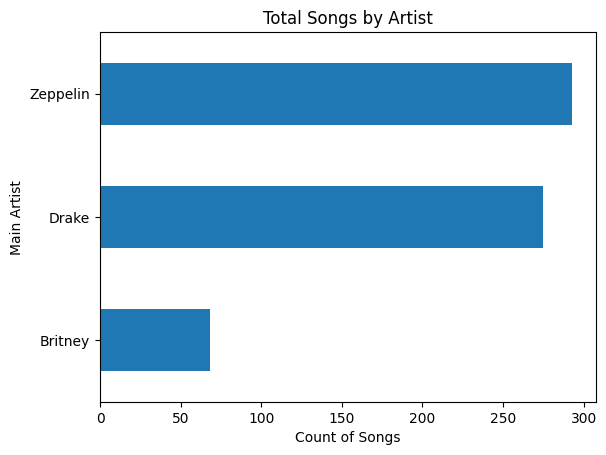

In [18]:
# Calculate the count per main artist, sort in descending order and plot
df['main_artist'].value_counts().sort_values().plot(kind='barh')
# Add axes labels and title and plot
plt.title('Total Songs by Artist')
plt.ylabel('Main Artist')
plt.xlabel('Count of Songs')
plt.show()

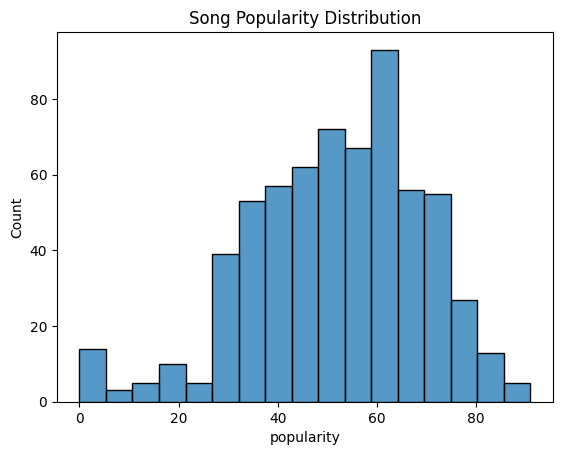

In [19]:
# Histogram of popularity values
sns.histplot(x='popularity', data=df).set(title="Song Popularity Distribution");

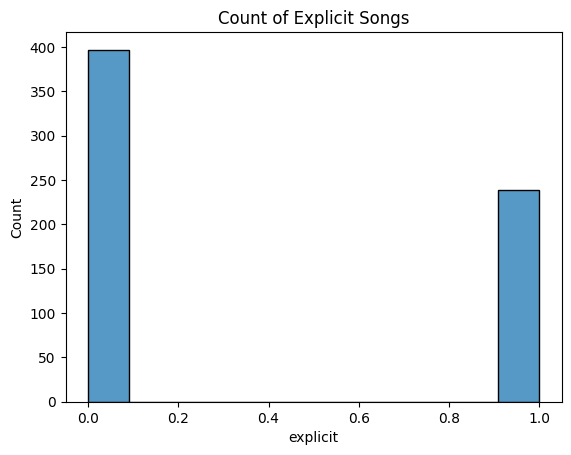

In [20]:
# Histogram of 'explicit' values
sns.histplot(x='explicit', data=df).set(title="Count of Explicit Songs");

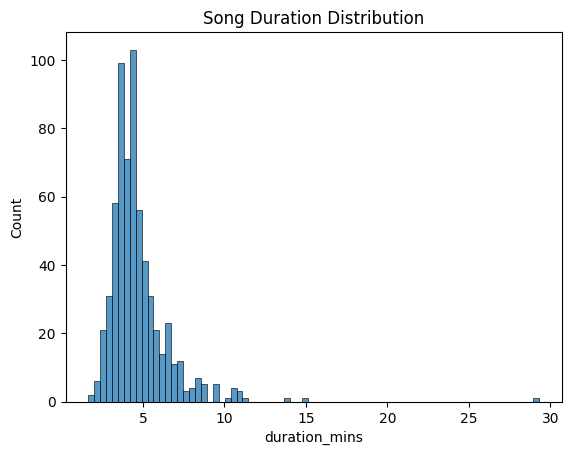

In [21]:
sns.histplot(x='duration_mins', data=df).set(title="Song Duration Distribution");

## Song Releases Over Time

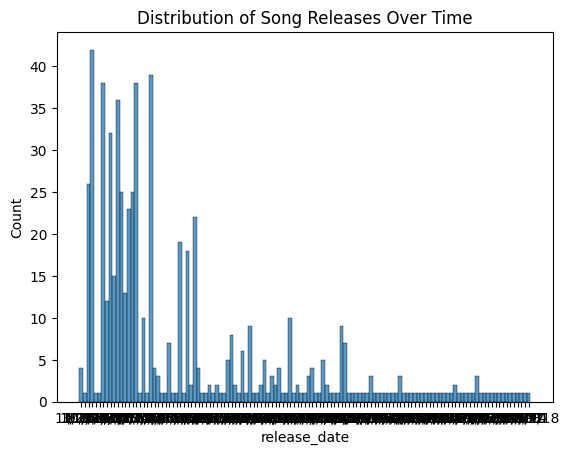

In [22]:
sns.histplot(x='release_date', data=df).set(title="Distribution of Song Releases Over Time");

Instead, let's look at distribution of release year, or release month, rather than day-by-day distributions.

In [23]:
# Create a new column for release year and release month
df['release_date'] = pd.to_datetime(df['release_date'])

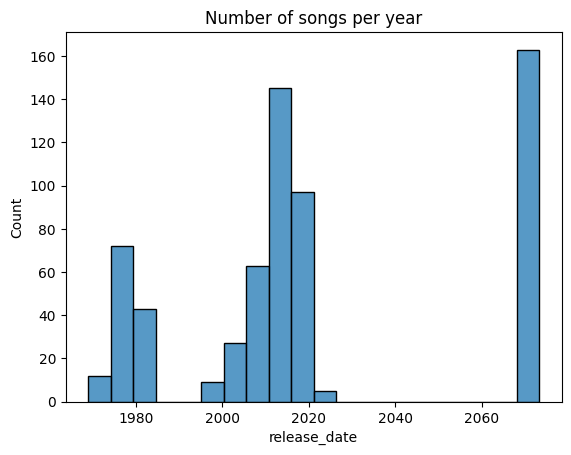

In [24]:
sns.histplot(x='release_date', data=df, bins=20).set(title="Number of songs per year");

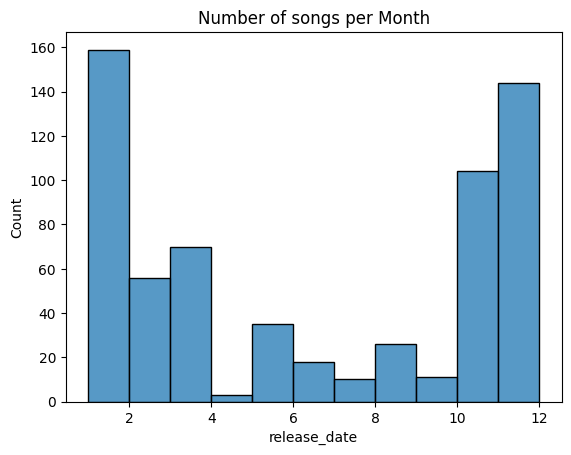

In [25]:
sns.histplot(df['release_date'].dt.month).set(title="Number of songs per Month");

## Distribution of Audio Features 

Let's use loops to make create graphs more efficently.

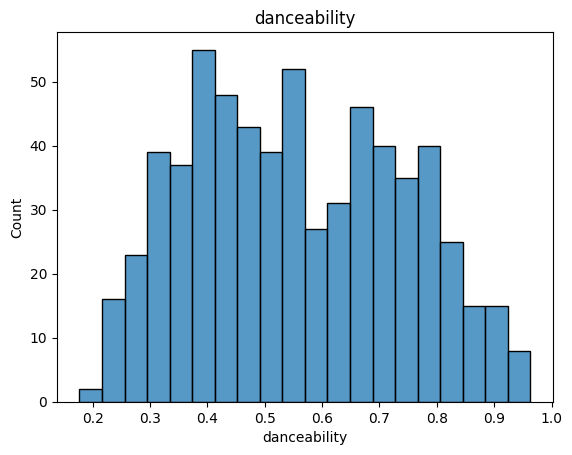

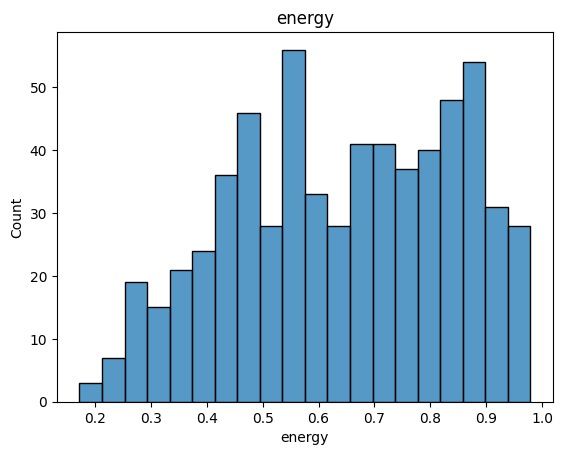

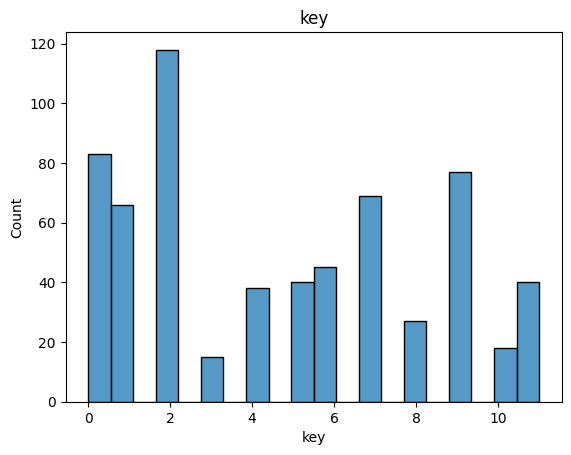

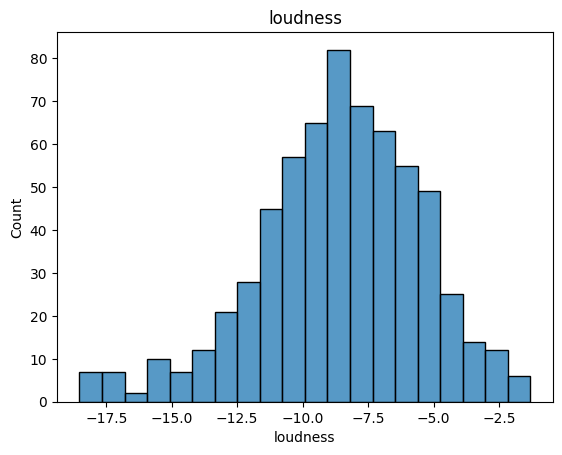

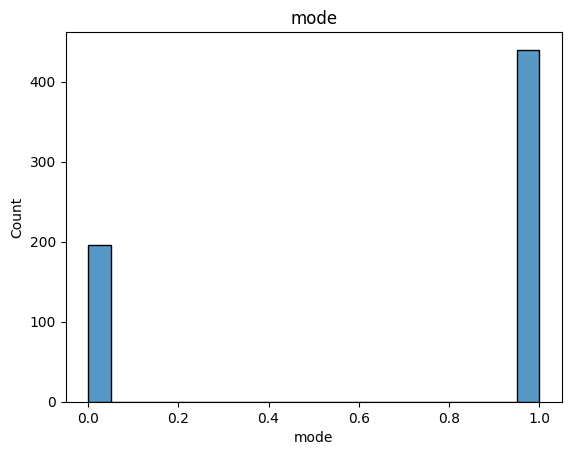

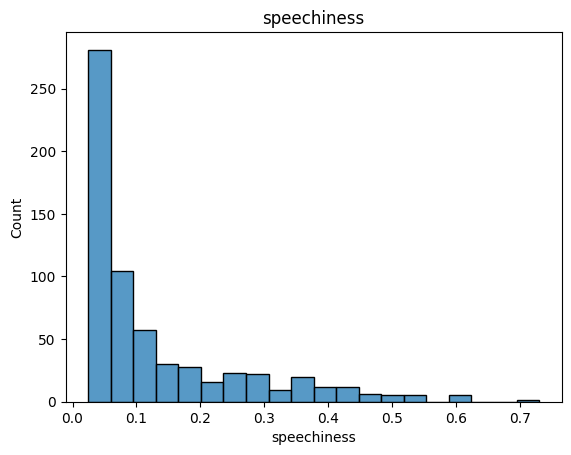

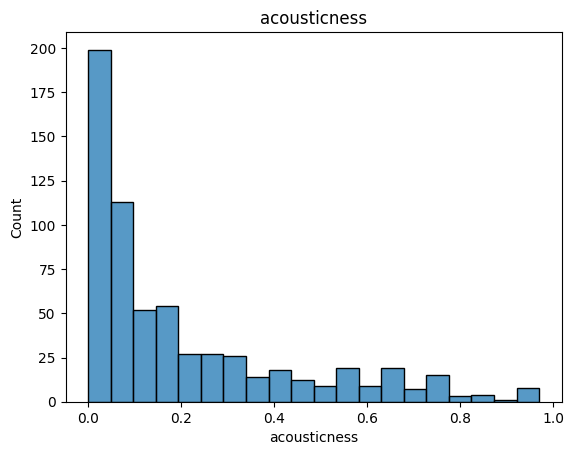

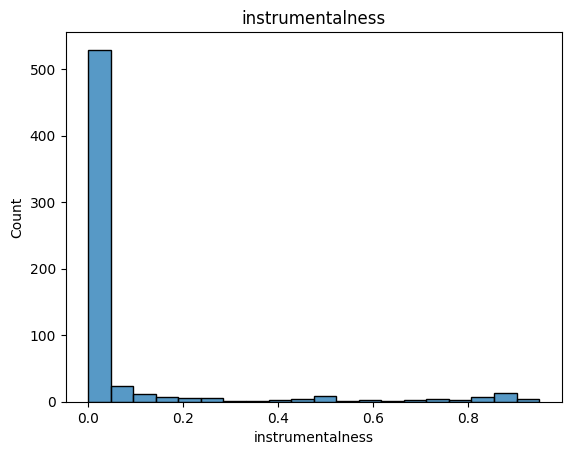

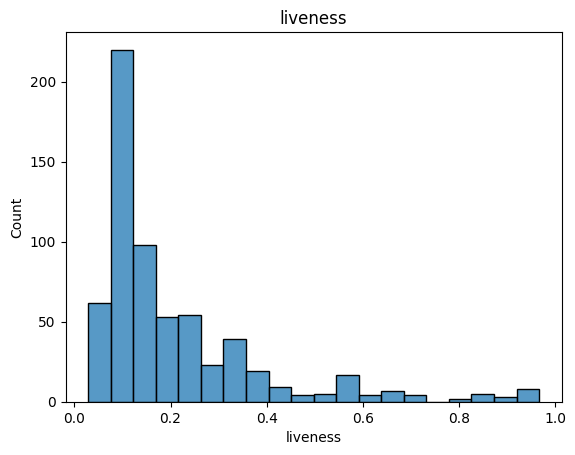

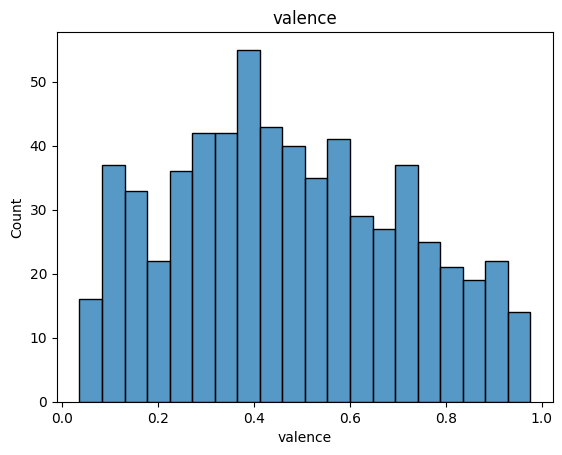

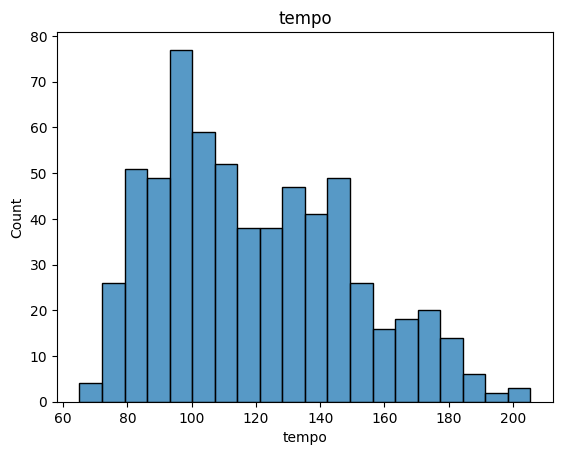

In [26]:
# Define a list of interesting columns of numerical data
interesting_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Loop through this list, creating a histogram of each one
for col in interesting_columns:

    # Plot
    sns.histplot(x=col, data=df, bins=20)
    plt.title(col)
    plt.show()

    print('\n')

## Top 10 Songs across Audio Features 

In [27]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist',
       'duration_mins'],
      dtype='object')

In [28]:
# Filter columns to just these core audio features:
audio_columns = ['popularity', 'duration_mins', 'key', 'danceability', 'energy', 'loudness',
                 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'time_signature']

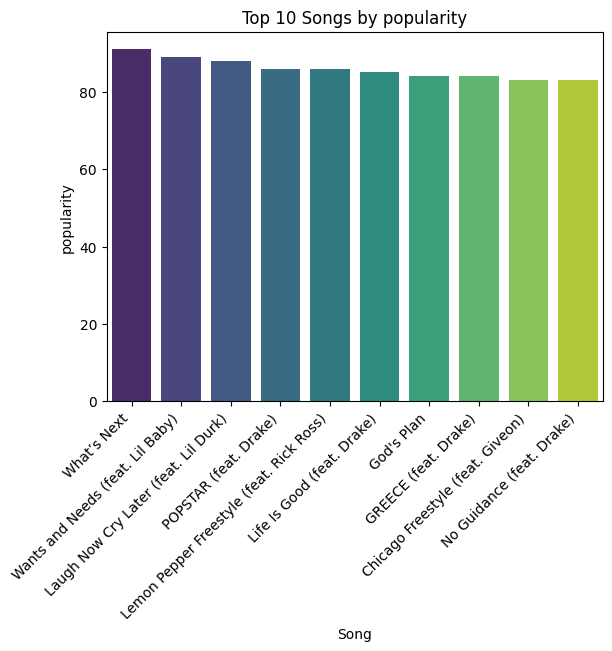

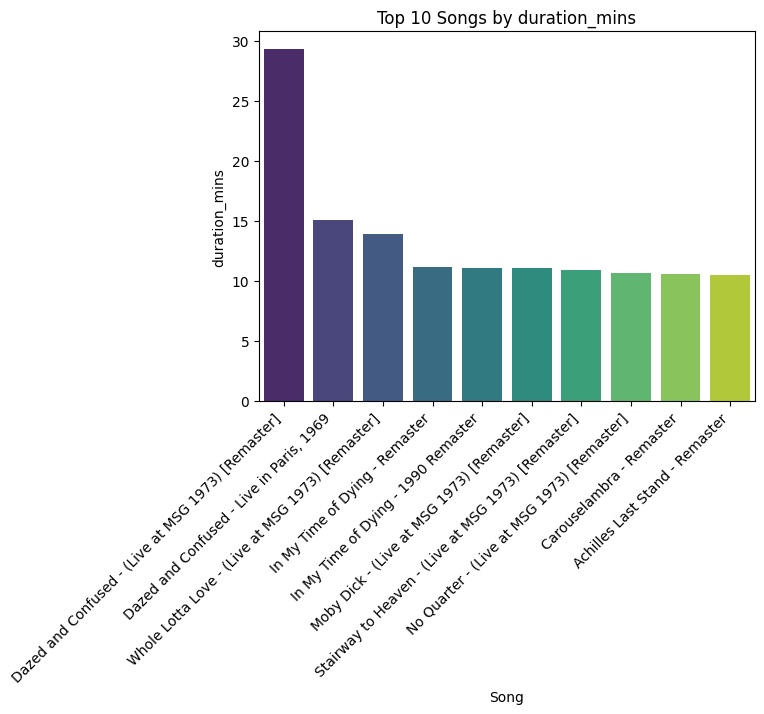

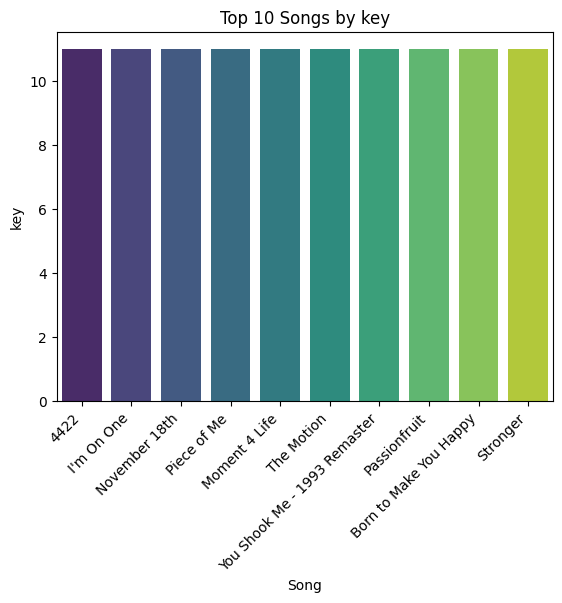

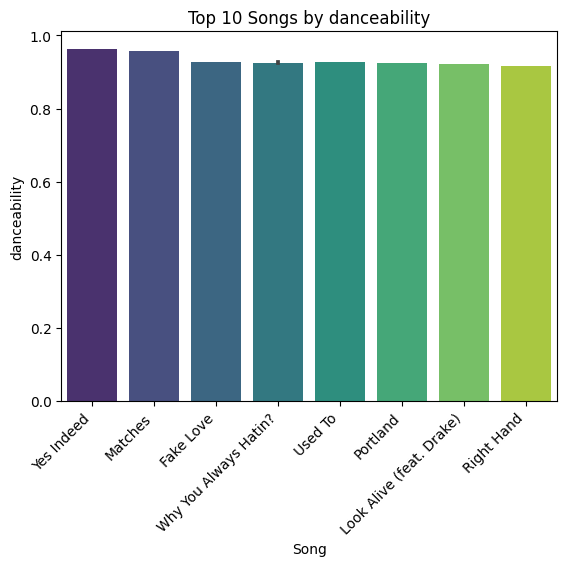

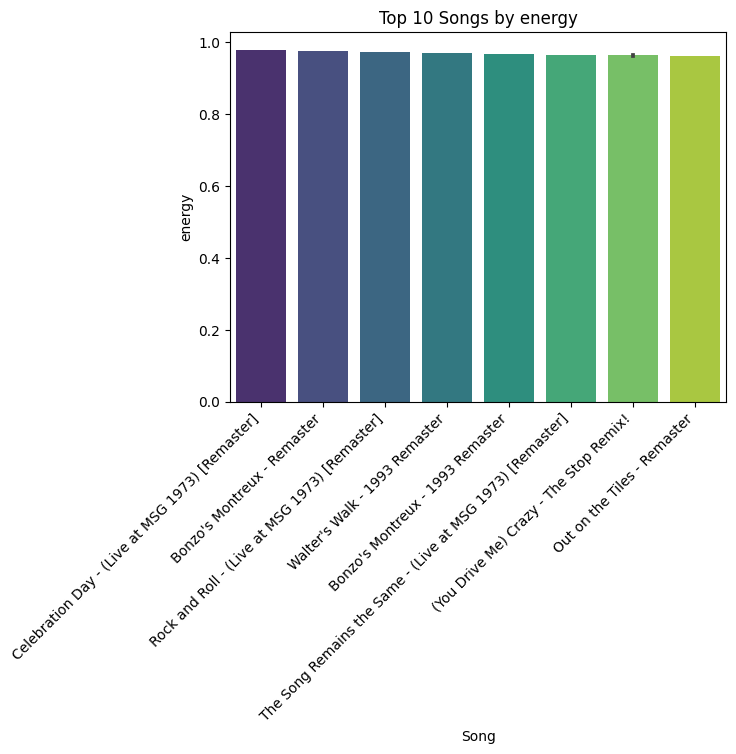

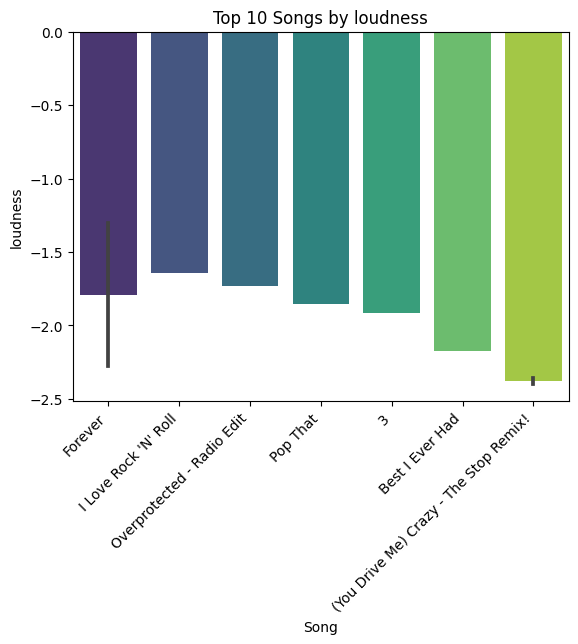

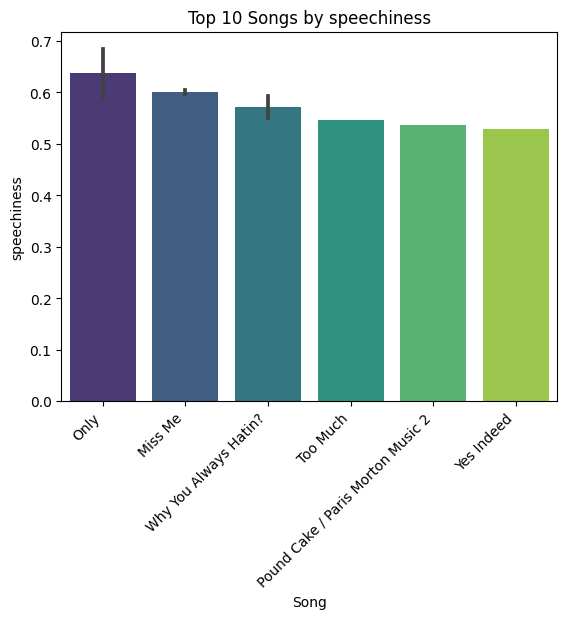

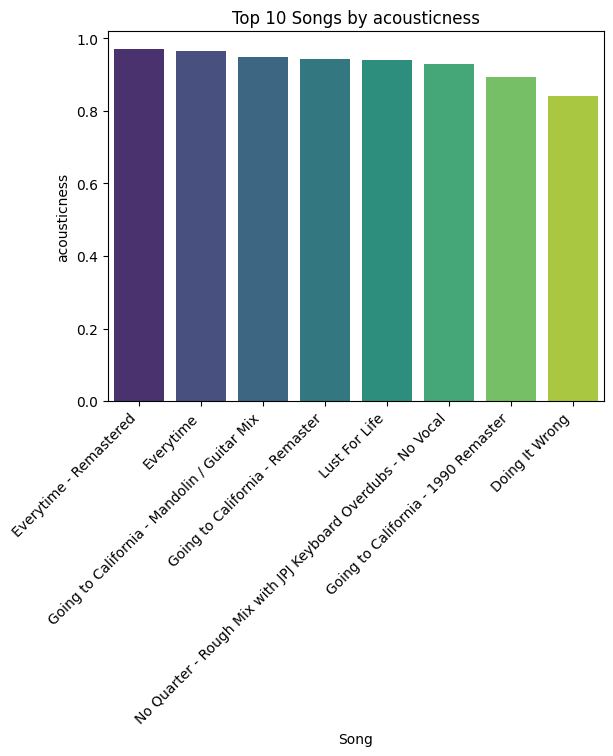

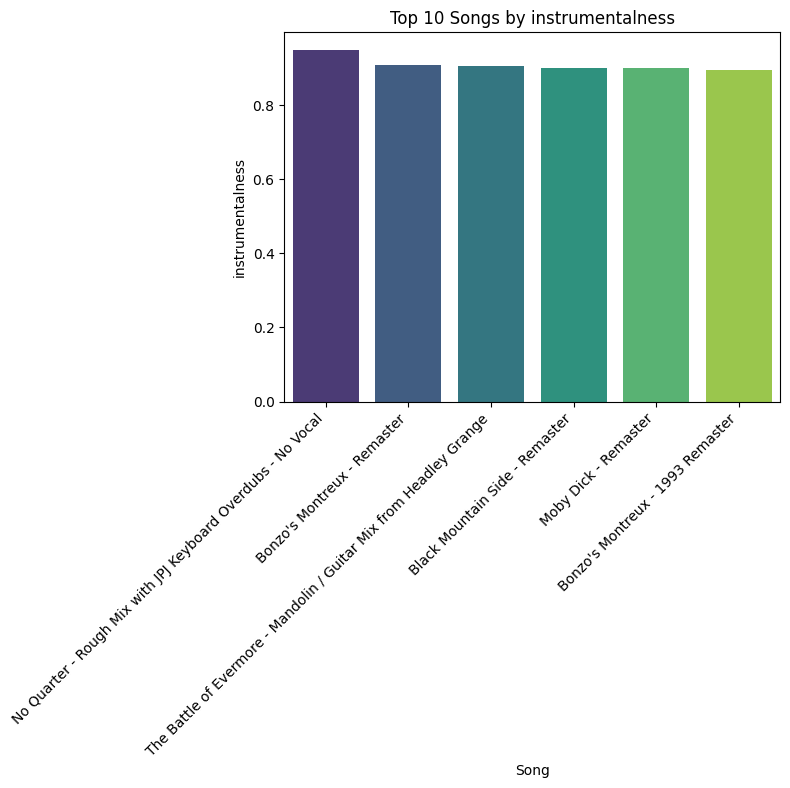

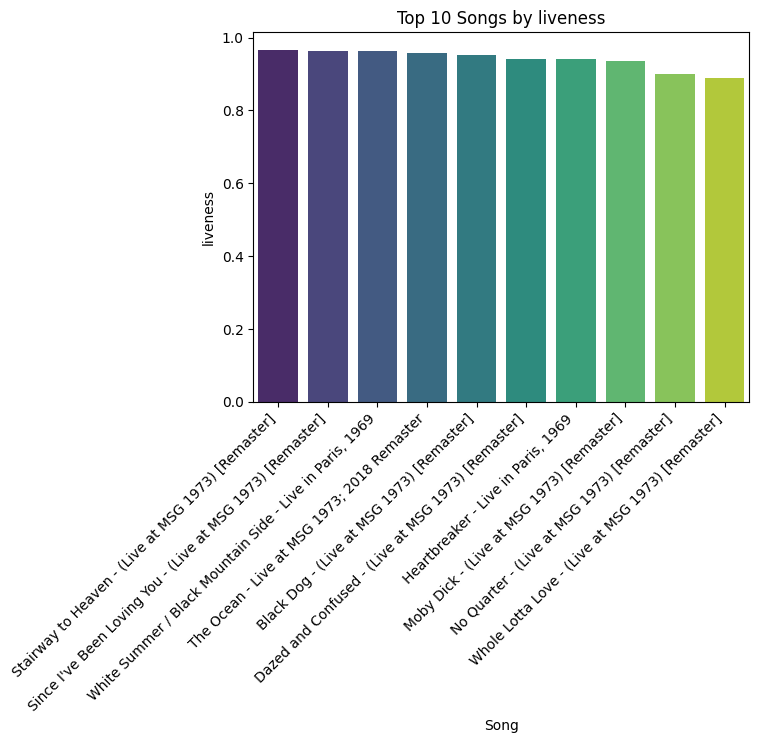

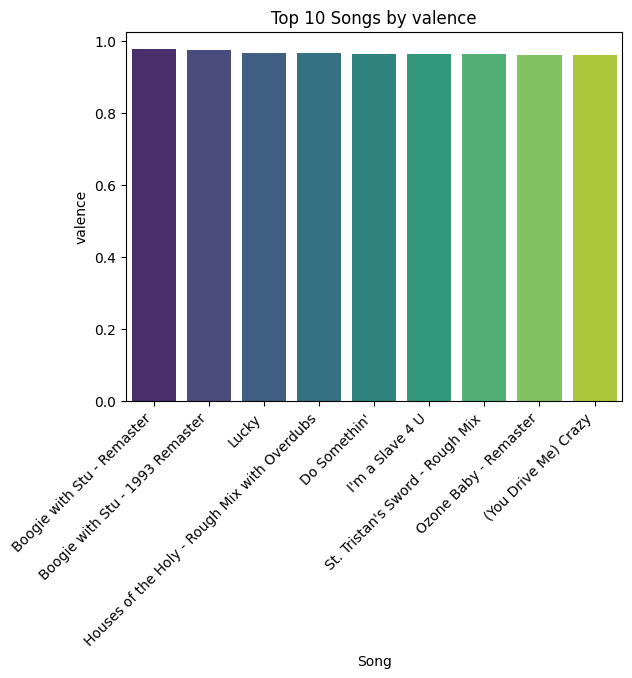

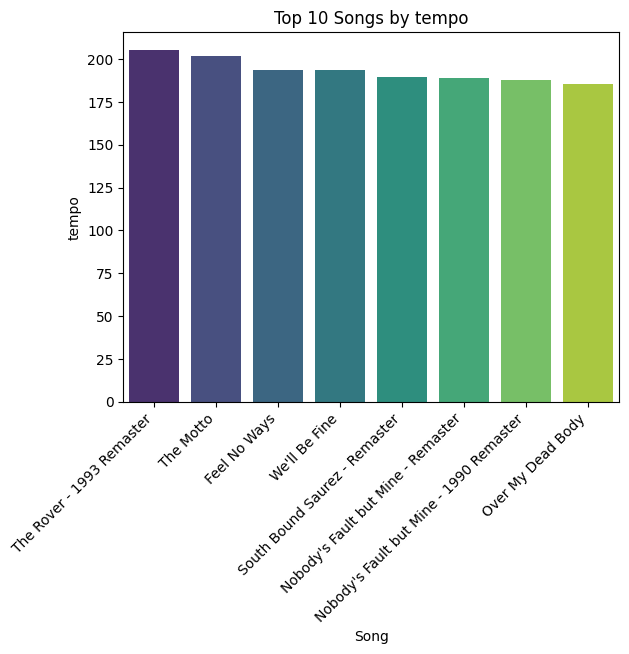

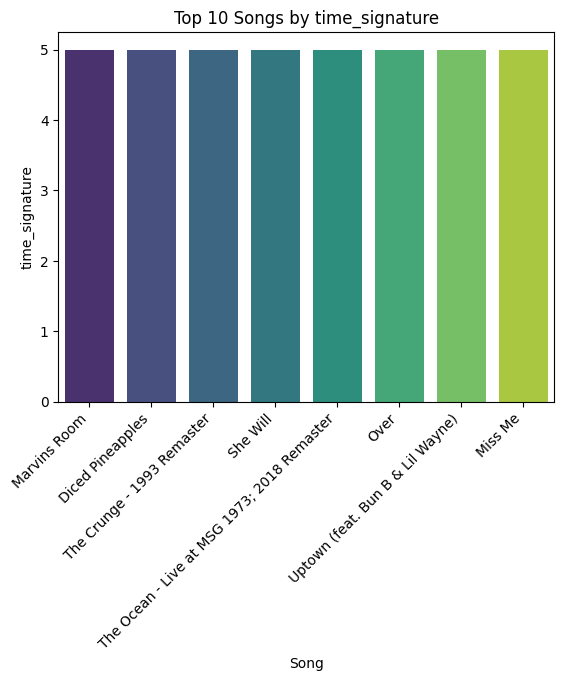

In [29]:
# for each column name in our list
for column in audio_columns:
    
    # Sort the DataFrame in descending order for each feature
    top_songs = df[['name', column]].sort_values(by=column, ascending=False).head(10)
    
    # Plot a bar graph for the top songs
    sns.barplot(x='name', y = column, data=top_songs, palette='viridis')
    plt.title(f'Top 10 Songs by {column}')
    plt.xlabel('Song')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

    # and print a blank line for extra space
    print('\n')

## What are the audio features that distinguish Drake, Britney Spears, and Led Zeppelin from one another?

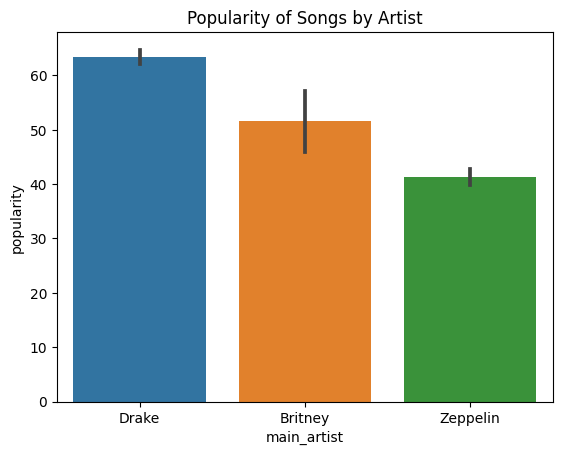

In [30]:
sns.barplot(x='main_artist', y='popularity', data=df)
plt.title("Popularity of Songs by Artist");

Despite Led Zeppelin being the least popular overall by Spotify standards, Britney songs have a wider range in popularity.

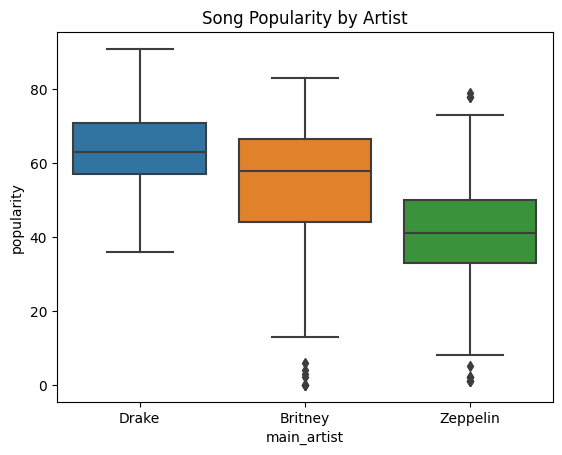

In [31]:
sns.boxplot(x='main_artist', y='popularity', data=df)
plt.title("Song Popularity by Artist");

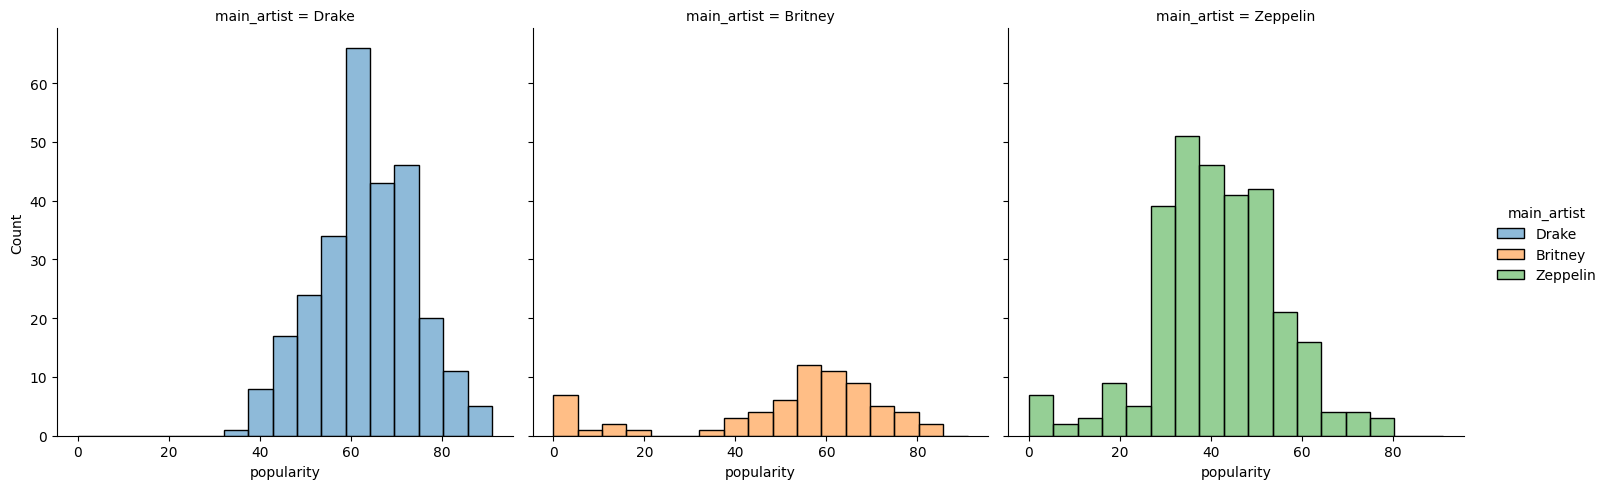

In [32]:
sns.displot(x='popularity', hue='main_artist', col='main_artist', data=df)
plt.show()

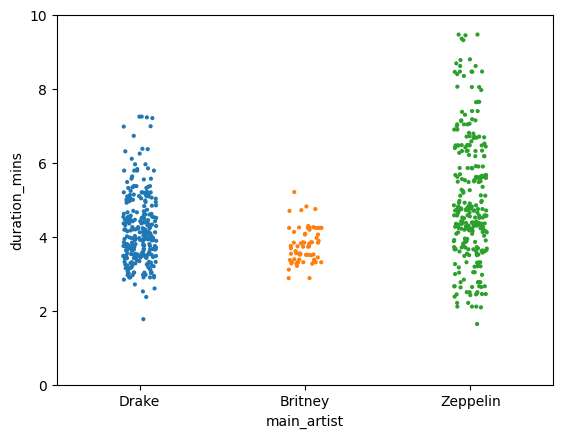

In [33]:
# Let's do the same for duration
sns.stripplot(x='main_artist', y='duration_mins', data=df, s=3)
plt.ylim(0,10) # restricts the range of the y-axis from 0 to 10
plt.show()

In [34]:
audio_columns

['popularity',
 'duration_mins',
 'key',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

Let's use loops again to compare attributes across each artist.

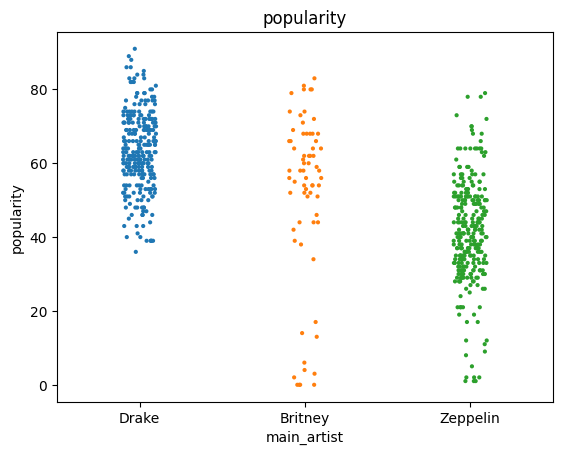

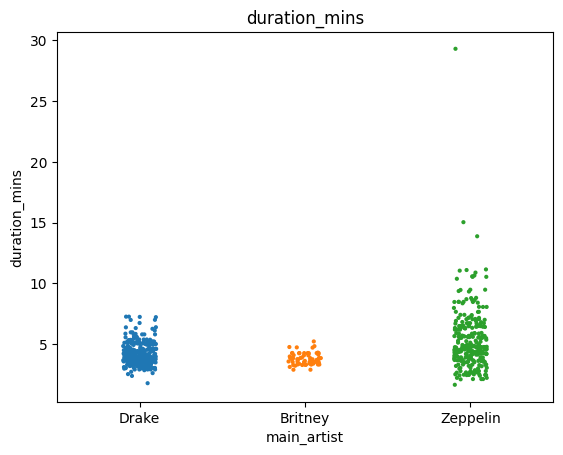

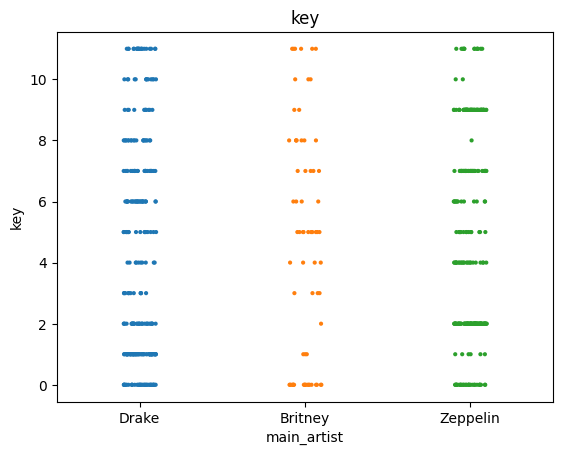

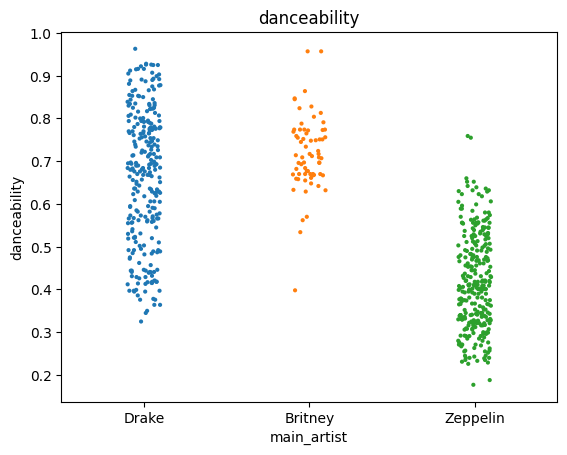

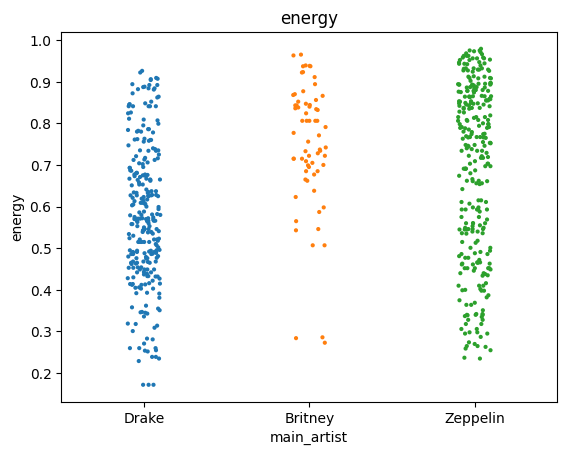

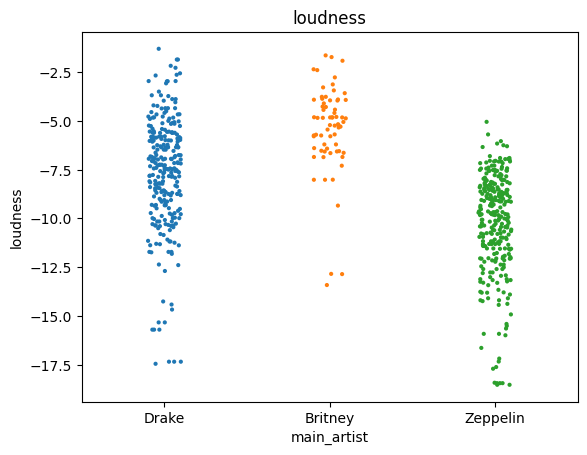

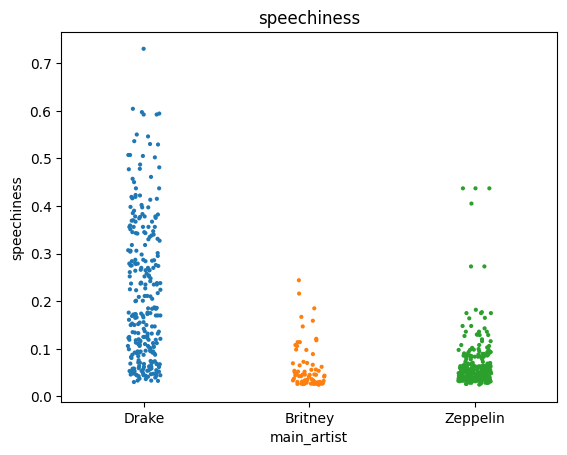

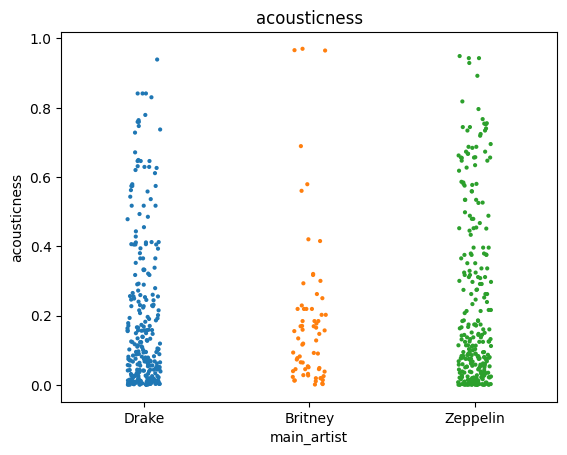

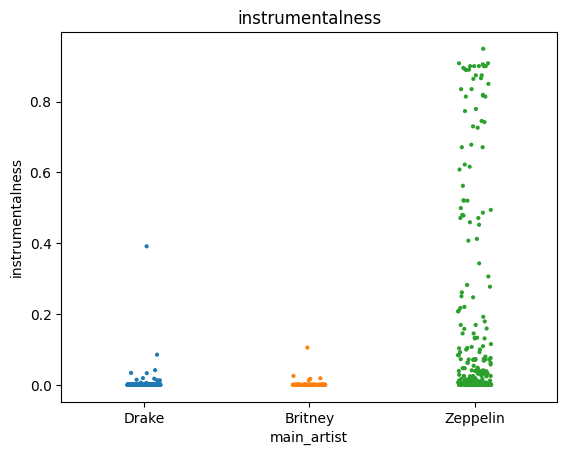

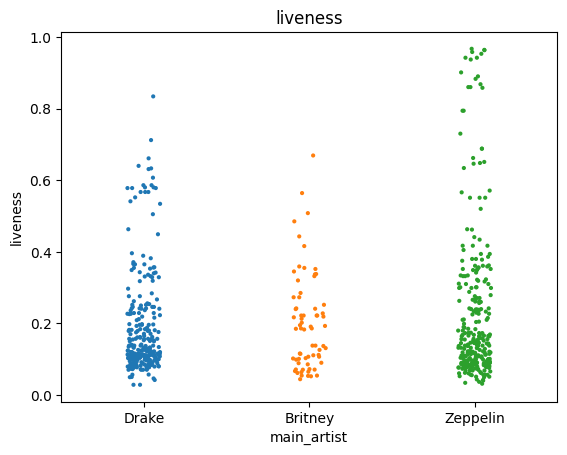

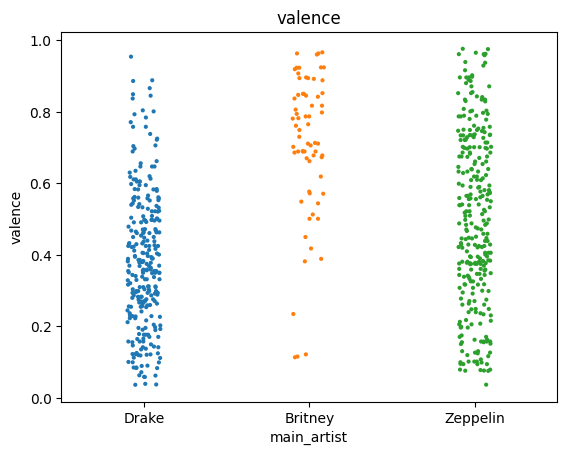

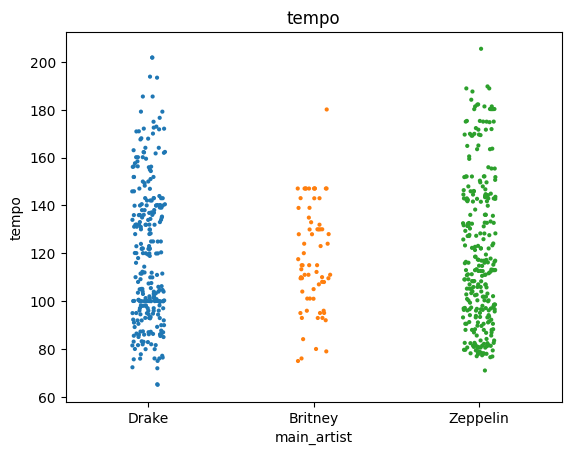

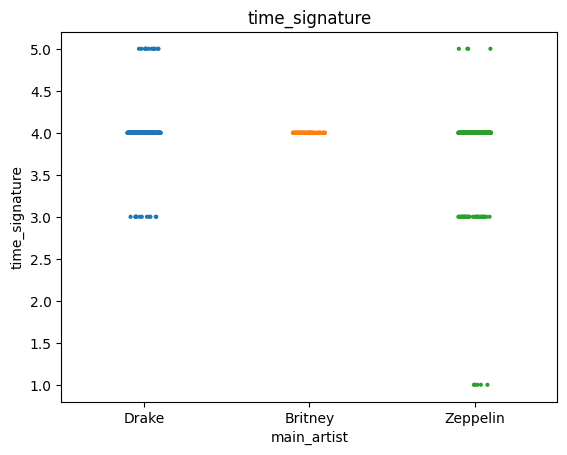

In [35]:
# for each column name in our list
for column in audio_columns:

    # draw a strip plot with an informative title
    sns.stripplot(x='main_artist', y = column, data=df, s=3)
    plt.title(column)
    plt.show()

    # and print a blank line for extra space
    print('\n')

Drake’s music is characterized with high danceability, key complexity, and loudness, along with greater popularity and speechiness. 

Britney Spears' songs typically have a lower tempo and consistent time signature. 

In contrast, Led Zeppelin’s tracks are marked by high energy, greater instrumental complexity, lower danceability, and longer duration.

Overall, the values for Britney are more consistent or concentrated around a particular range, whereas those for Drake and Zeppelin are more varied. This could mean that her songs tend to have similar audio features. 

## Machine Learning Exercise : Predicting Artists Based on Audio Features

There are clear differences between artists across the different metrics. This makes me wonder: Given some song data from an unknown artist, could I predict which of these 3 it’s most likely to be?

I suspect that if we **did** receive some of these audio statistics but didn't know which artist it belongs to, we could classify it.

In [36]:
from sklearn.linear_model import LogisticRegression

# Pull out the main artist as the target to be predicted and the audio columns
y = df['main_artist']
X = df[audio_columns]

# Instantiate and fit a model
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

# Calculate the accuracy score (%)
lr.score(X,y)*100.0

91.82389937106919

Given the audio features provided, we can predict with ~92% accuracy which artist performed the song.

Let's use the Logistic Regression model to  make predictions by plugging in numerical values for each audio feature and having the system guess which artist it corresponds to. 

In [37]:
import numpy as np

# Example feature values for prediction
example_attributes = np.array([65, 3.5, 5, 0.8, 0.7, -5.0, 0.1, 0.05, 0.0, 0.2, 0.6, 120.0, 4])

# Reshape the features to match the expected input shape for the model
example_attributes = example_attributes.reshape(1, -1)

# Predict the artist
predicted_artist = lr.predict(example_attributes)

print(f"The predicted artist is: {predicted_artist[0]}")


The predicted artist is: Drake


/Users/mariannabeaute/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Let's try another!

In [38]:
example_attributes = np.array([60, 12, 2, 0.8, 0.7, -7.5, 0.2, 0.6, 0.2, 0.4, 0.8, 100.0, 4])

# Reshape the features to match the expected input shape for the model
example_attributes = example_attributes.reshape(1, -1)

# Predict the artist
predicted_artist = lr.predict(example_attributes)

print(f"The predicted artist is: {predicted_artist[0]}")


The predicted artist is: Zeppelin


/Users/mariannabeaute/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Machine Learning Exercise : Which features most strongly influence a song's popularity?

Use a simple linear regression or a more advanced model like Random Forest to determine which features most strongly influence a song's popularity.

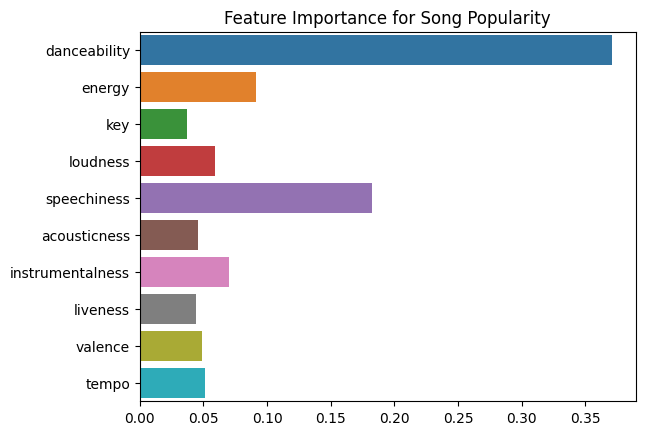

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features and target
features = df[['danceability', 'energy', 'key', 'loudness', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
target = df['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_

# Graph feature importance
sns.barplot(x=importance, y=features.columns)
plt.title("Feature Importance for Song Popularity")
plt.show()

Danceability plays a big role in a song's popularity, meaning tracks that are easier to dance to are more likely to succeed. Artists and producers might want to focus on creating more danceable music to boost their chances of of achieving popularity and perhaps hitting the charts. 

While danceability a key factor, it's not the only one that matters—different data or models could show different results, so it's important to keep that in mind.